In [156]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%pylab

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [162]:
import pandas
import fio_parse
from pathlib2 import Path

In [163]:
input_dirs=list(Path('/alaska/bharat/fio-rrc16p16/').iterdir())
output_dir=Path('output-ceph/fio-rrc16p16')

Scanning for fio data in /alaska/bharat/fio-rrc16p16/fio-rrc16p16-xw2tr
I/O size      128, job read: 127255 samples
I/O size      256, job read: 117703 samples
I/O size      512, job read: 114376 samples
I/O size     1024, job read: 117313 samples
I/O size     2048, job read: 135827 samples
I/O size     4096, job read: 142753 samples
I/O size     8192, job read: 153162 samples
I/O size    16384, job read: 128067 samples
I/O size    32768, job read: 65775 samples
I/O size    65536, job read: 31473 samples
I/O size   131072, job read: 16876 samples
I/O size   262144, job read: 7972 samples
I/O size   524288, job read: 4512 samples
I/O size  1048576, job read: 2397 samples
I/O size  2097152, job read: 1502 samples
I/O size  4194304, job read: 915 samples
I/O size  8388608, job read: 473 samples
I/O size 16777216, job read: 307 samples
Aggregated data for 45654232 I/Os, max latency 1069547.520000 us
Scanning for fio data in /alaska/bharat/fio-rrc16p16/fio-rrc16p16-4tprl
I/O size      128, 

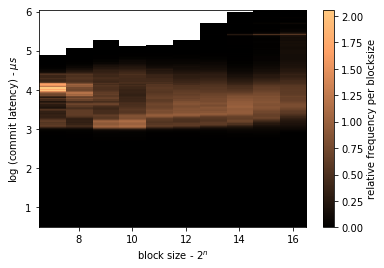

In [161]:
clat_grid = fio_parse.ClatGrid(input_dirs, output_dir, 200, force=True, logscale=True)

In [164]:
cldf = pandas.read_csv(output_dir/'read-read-clat.dat',header=None,index_col=0,names=['ns','freq'],delimiter='\t')
cldf.index.name = 'block size'
cldf.columns.name = 'bandwidth'

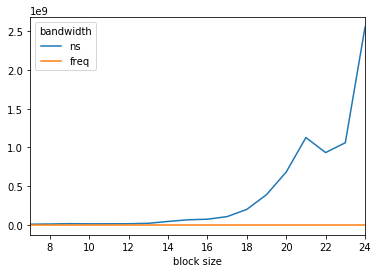

In [165]:
cldf.groupby(cldf.index).mean().plot(xlim=[7,24])

In [166]:
bwdf = pandas.read_csv(output_dir/'read-bandwidth.dat',header=None,index_col=0,names=['read','write'],delimiter='\t')
bwdf.index.name = 'block size'
bwdf.columns.name = 'bandwidth'

Text(0,0.5,'bandwidth')

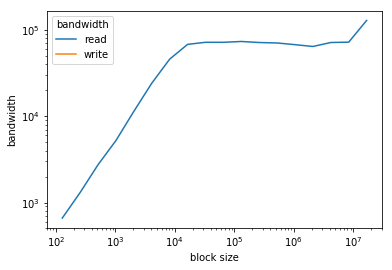

In [167]:
ax = bwdf.groupby(bwdf.index).mean().plot(loglog=True)
ax.set_ylabel('bandwidth')

In [168]:
cols=['iops','1%','5%','10%','20%','30%','40%','50%','60%','70%','80%','90%','95%','99%','99.5%','99.9%','99.95%','99.99%']
ildf=pandas.read_csv(output_dir/'read-read-iops-latency.dat',header=None,index_col=0,names=cols,delimiter='\t')
ildf.index.name = 'block size'
ildf.columns.name = 'percentiles'

In [169]:
mildf = ildf.groupby(ildf.index).mean()/clat_grid.divider
mildf.index = np.log2(mildf.index)

Plotting to output-ceph/fio-rrc16p16/blob.png


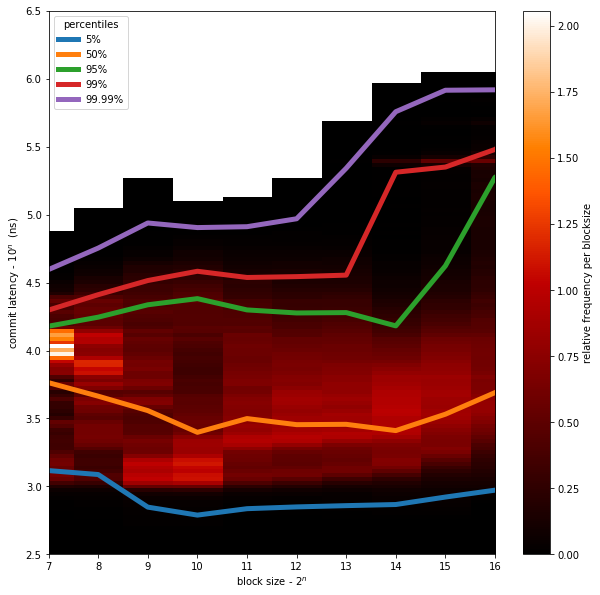

In [176]:
fig = clat_grid.plot_data(output_dir=output_dir,cmap='gist_heat')
# fig=df[[8,12,14,18]].plot(figsize=(10,10))
np.log10(mildf[['5%','50%','95%','99%','99.99%']]).plot(figsize=(10,10),ax=fig.axes[0],xlim=[7,16],ylim=[2.5,6.5], linewidth=5)
plt.xlabel('block size - $2^n$')
plt.ylabel('commit latency - $10^n$  (ns)')
plt.savefig('%s/%s'%(output_dir,'decorated-blog.png'))